# Notes
This created some unexpected results. When all cars begin at their desired speed (33 m/s), this simulation showed very few traffic problems. When starting at a lower speed, there was more clustering of cars.

I suspect a problem with this simulation is that the car_locations and list_of_cars do not properly update at the beginning of each time slice (i.e. - a new set of car locations is produced, but those cars may not "remember" their speed from the previous round).

The functional parts of this at the bottom of the first cell are admittedly sloppy/redundant, and should be cleaned up when possible.

# Results
When starting from a speed of 25 m/s, the eventual average speed is between 26 and 27 m/s. Mean speed + one standard deviation = 28.5 m/s, or 100 kph (65 mph).

In [215]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_cars = 30  #number of cars per 1 km of road
num_sec = 60   #number of seconds to run simulation for
car_locations = np.linspace(0, 1000, num_cars, dtype = "int64", endpoint=False)
time = 0

class Car:
    def __init__(self, location, pref_speed=33, accel_rate=2, decel_rate=2,
                 decel_chance=0.1, speed=25, time=0):
        self.pref_speed = pref_speed
        self.accel_rate = accel_rate 
        self.decel_rate = decel_rate
        self.decel_chance = decel_chance
        self.speed = speed
        self.location = location
        self.time = time
    #pref_speed is each drivers' desired speed without traffic, in m/s
    #accel_rate and decel_rate are added to the car's speed when appropriate
    #speed is current speed, in m/s
    #location is the front bumper of the car, between 0 and 1000
        
    #checks the distance    
    def get_distance(self):
        if self.location > 1000:
            self.location -= 1000
        for i, self in enumerate(car_locations):
            return car_locations[i+1] - 5 - car_locations[i]
    
    def adjust_speed(self):
        if self.get_distance() < self.speed:
            self.speed = car_ahead.speed
            return self.speed
        elif random.random() <= self.decel_chance:
            self.speed -= self.decel_rate
            return self.speed
        elif self.speed < self.pref_speed:
            self.speed += self.accel_rate
            return self.speed
        else: 
            pass
            
    def __str__(self, car_locations):
        for x in car_locations:
            return self.car_ahead
        
    def move_ahead(self):
    #moves 
        if self.location + self.speed > 1000:
            self.location += self.speed - 1000
        elif self.speed > self.get_distance():
            self.location += self.get_distance() - 6
        else:
            self.location += self.speed
    
list_of_cars = []
for x in car_locations:
    car = Car(x)
    try:
        car_ahead = Car(car_locations[x+1])
    except:
        car_ahead = Car(car_locations[0])
    list_of_cars.append(car)

def next_turn():
    y = []
    for x in list_of_cars:
        x.adjust_speed()
        x.move_ahead()
        y.append(x.location)
    return y
    
def again():
    z = [car_locations]
    for x in np.arange(num_sec-1):
        z.append(next_turn())
    return z

all_speeds = []
def get_mean_speed():
    for x in list_of_cars:
        all_speeds.append(x.speed)
    return np.mean(all_speeds)

def get_stddev_speed():
    return np.std(all_speeds)

#print(len(np.arange(num_sec)))
all_positions = again()
#print(all_positions)
print(get_mean_speed())
print(get_stddev_speed())

26.8
1.81475434518


In [210]:
time_slices = [[x] * num_cars for x in range (num_sec)]
for x in car_locations:
    if x > 1000:
        x -= 1000

#print(len(time_slices))
#print(len(all_positions))
#print(all_positions[0])

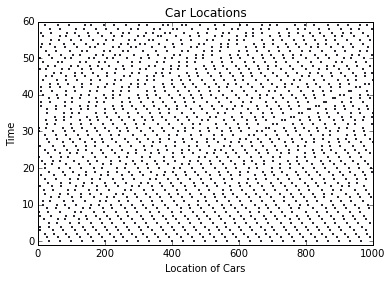

In [187]:
plt.scatter(all_positions, time_slices, s=1)
plt.xlabel("Location of Cars")
plt.ylabel("Time")
plt.title("Car Locations")
plt.xlim(0, 1000)
plt.ylim(-1, num_sec)
plt.show()